# Import libraries and setup a few variables

In [1]:
# import libraries
import os
import pandas as pd
import numpy as np

#import ArcGIS mapping libraries
from arcgis.gis import *
gis = GIS()

In [2]:
# setup directories
dirWork = os.getcwd()
dirData = os.path.join(dirWork, r'data')

print("Working Directory: " + dirWork)
print("Data Directory: "    + dirData)

Working Directory: E:\GitHub\Continuous-Count-Station-Data-Demo
Data Directory: E:\GitHub\Continuous-Count-Station-Data-Demo\data


In [3]:
# continuous count station shapefile path and filename
shpCcsStations = os.path.join(dirWork, r'data\Continuous_Count_Station_Locations\Continuous_Count_Station_Locations.shp')

# CCS data CSV file (must unzip first)
csvCcsData = os.path.join(dirWork, r'data\CCSHourDir_2013to2019.csv')

In [4]:
# a few settings to adjust/track

# set display of floats to commas
pd.options.display.float_format = '{:,.0f}'.format

# get defaults for max rows and columns when a dataframe is display
defaultMaxRows = pd.get_option('display.max_rows')
defaultMaxCols = pd.get_option('display.max_columns')

display('Max rows: ' + str(defaultMaxRows))
display('Max cols: ' + str(defaultMaxCols))

'Max rows: 60'

'Max cols: 20'

In [5]:
#create map1 that centers on Utah (can replace 'Utah' with any place name or leave blank for entire world)
map1 = gis.map('Utah')

#create spatially-enabled data frame from shapefile
sdfCcsStations = pd.DataFrame.spatial.from_featureclass(shpCcsStations)

#plot sdf using class breaks and blue colors for 'columnname' field
#layer will be added to 'map1' above
sdfCcsStations.spatial.plot(map_widget = map1)

#show map1
map1

MapView(layout=Layout(height='400px', width='100%'))

# Read in UDOT Continous Count Station hourly data

In [6]:
# read in data
# REMEMBER TO UNZIP FILE IF NEWLY CLONED REPOSITORY
dfCCS = pd.read_csv(csvCcsData)
display(dfCCS)

,STATION,YEAR,MONTH,DAY,DOW,HOUR,DIR,HOURVOL
0,301,2013,1,1,1,0,N,358
1,301,2013,1,1,1,0,P,288
2,301,2013,1,1,1,1,N,435
3,301,2013,1,1,1,1,P,292
4,301,2013,1,1,1,2,N,277
...,...,...,...,...,...,...,...,...
9379250,716,2019,6,29,5,0,P,7494
9379251,716,2019,6,30,6,0,N,5032
9379252,716,2019,6,30,6,0,P,4707
9379253,716,2019,7,29,0,0,N,7037


In [7]:
# add a date field from year, month, day columns
dfCCS['DATE'] = pd.to_datetime(dict(year=dfCCS.YEAR, month=dfCCS.MONTH, day=dfCCS.DAY))
display(dfCCS)

,STATION,YEAR,MONTH,DAY,DOW,HOUR,DIR,HOURVOL,DATE
0,301,2013,1,1,1,0,N,358,2013-01-01
1,301,2013,1,1,1,0,P,288,2013-01-01
2,301,2013,1,1,1,1,N,435,2013-01-01
3,301,2013,1,1,1,1,P,292,2013-01-01
4,301,2013,1,1,1,2,N,277,2013-01-01
...,...,...,...,...,...,...,...,...,...
9379250,716,2019,6,29,5,0,P,7494,2019-06-29
9379251,716,2019,6,30,6,0,N,5032,2019-06-30
9379252,716,2019,6,30,6,0,P,4707,2019-06-30
9379253,716,2019,7,29,0,0,N,7037,2019-07-29


In [8]:
# list stations
dfCCS['STATION'].unique()

array([301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 312, 313, 314,
       315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 327, 329,
       332, 333, 335, 340, 341, 348, 349, 350, 351, 353, 354, 355, 362,
       363, 382, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 411,
       412, 414, 415, 416, 418, 420, 421, 424, 425, 427, 430, 431, 501,
       502, 503, 504, 506, 507, 508, 509, 510, 511, 512, 513, 601, 602,
       605, 606, 609, 611, 612, 613, 614, 615, 616, 617, 619, 620, 621,
       622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634,
       635, 636, 637, 638, 639, 641, 642, 643, 644, 645, 646, 647, 648,
       649, 650, 651, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662,
       663, 665, 667, 669, 670, 671, 672, 674, 702, 703, 704, 711, 712,
       713, 714, 715, 716], dtype=int64)

# Check data by counting days of data in each month

In [9]:
#for checks and understanding
#calculate number of days with data per station per month

# calculate number of hours of data per day
dfCCS_days       = dfCCS     .groupby(['STATION','YEAR','MONTH','DAY'], as_index=False).agg(NUM_HOURS=('HOURVOL'  ,'size'))

# calculate number of days of data per monnth
dfCCS_days_month = dfCCS_days.groupby(['STATION','YEAR','MONTH'      ], as_index=False).agg(NUM_DAYS =('NUM_HOURS','size'))

# create pivot table to display 
dfCCS_days_month_pivot = dfCCS_days_month.pivot_table(index=['STATION'], columns=('YEAR','MONTH'), values='NUM_DAYS')#.reset_index()
dfCCS_days_month_pivot = dfCCS_days_month_pivot.fillna(0)

# display dataframe
display(dfCCS_days_month_pivot)

# export to CSV
##df_3.to_csv(os.path.join(dirIntermediate, r'StationMonthDays.csv'),index=False)

YEAR    2013                             ... 2019                           
MONTH     1  2  3  4  5  6  7  8  9  10  ...   3  4  5  6  7  8  9  10 11 12
STATION                                  ...                                
301       31 28 30 30 31 28 28 31 30 22  ...   31 29 29 30  0  7 28 31 30 31
302       31 28 30 30 31 30 31 29 30 31  ...   30 30 29 18 31 27 29 31 30 13
303       23 27 30 30 31 30 31 31 30 31  ...   30 30 31 30 31 31 29 31 30 28
304       31 28 30 30 31 30 31 31 30 31  ...   30 30 21 30 31 31 29 31 30 31
305       28 28 30 30 28 30 25 31 30 31  ...   30 30 31 30 31 27 29 31 30 31
...      ... .. .. .. .. .. .. .. .. ..  ...  ... .. .. .. .. .. .. .. .. ..
712        0  0  0  0  0  0  0  0  0  0  ...   30 30 21 30 29 20 29 31 30 24
713        0  0  0  0  0  0  0  0  0  0  ...   30 30 21 30 31 30 26 31 30 29
714        0  0  0  0  0  0  0  0  0  0  ...   30 30 21 30 31 31 29 31 30 31
715        0  0  0  0  0  0  0  0  0  0  ...   31 30 29 30  2  0  0  0  0  0
716        0  0  0  0  0  0  0  0  0  0  ...   31 30 26 30  1  0  0  0  0  0

[147 rows x 84 columns]

In [10]:
# show all dataframe

# set max rows and columns to none
pd.set_option('display.max_rows'   , None)
pd.set_option('display.max_columns', None)

# display dataframe
display(dfCCS_days_month_pivot)

# set max back to default
pd.set_option('display.max_rows'   , defaultMaxRows)
pd.set_option('display.max_columns', defaultMaxCols)

YEAR    2013                                  2014                             \
MONTH     1  2  3  4  5  6  7  8  9  10 11 12   1  2  3  4  5  6  7  8  9  10   
STATION                                                                         
301       31 28 30 30 31 28 28 31 30 22 30 31   31 28 30 30 31 29 29 29 28 31   
302       31 28 30 30 31 30 31 29 30 31 30 31   31 28 30 30 31 30 30 31 30 31   
303       23 27 30 30 31 30 31 31 30 31 30 31   31 28 30 30 26  0 23 31 30 31   
304       31 28 30 30 31 30 31 31 30 31 30 31   31 28 30 30 31 29 30 31 30 31   
305       28 28 30 30 28 30 25 31 30 31 30 31   31 22 30 30 31 30 24 31 30 31   
306       30 25 30 30 31 30 31 31 30 31 30 31   31 28 30 30 30 30 30 31 30 31   
307       31 28 30 30 31 30 31 31 30 31 30 27   31 20 30 30 31 28 31 31 30 31   
308       31 28 30 30 31 30 30 31 30 31 29 28   31 28 30 30 31 30 31 31 30 31   
309       25 28 30 30 31 30 30 31 30 31 30 27   31 28 29 30 31 28 30 31 30 30   
310       31 27 30 30 30 22 31 31 30 31 30 31   31 28 29 30 31 29 31 31 30 31   
312       23 28 28 30 18 30 31 31 30 31 30 31   30 28 29 30 31 29 29 31 30 31   
313       31 28 30 30 31 30 31 31 30 31 30 29   31 28 29 30 31 30 25 31 30 26   
314       30 28 30 30 31 30 31 30 30 31 11 31   31 28 30 30 31 30 29 31 30 30   
315       30 28 29 30 31 29 31 31 30 31 30 31   31 28 30 30 31 29 31 31 30 31   
316       31 28 30 30 31 30 31 31 30 31 30 31   31 28 30 29 31 30 31 31 30 31   
317       31 28 30 30 31 30 31 31 30 31 30 29   31 28 30 30 31 30 31 31 30 30   
318       27 28 30 30 31 30 31 31 30 31 30 26   31 28 29 30 31 28 31 31 30 31   
319       31 28 29 30 31 30 31 31 30 31 30 31   31 28 30 30 31 12 31 31 30 31   
320       24 28 30 30 22 18 27 30 26 29 30 28   31 25 30 30 31 24 30 29 30 31   
321       31 28 30 30 31 30 31 31 30 31 30 31   31 28 29 30 31 30 30 31 30 31   
322       31 28 30 30 31 30 27 30 30 25 30 31   31 28 30 30 31 30 31 31 30 31   
323       31 28 30 30 31 30 31 31 30 31 30 31   31 28 30 30 31 30 31 31 30 31   
324       31 28 30 30 31 30 31 31 30 31 30 31   31 28 30 30 31 30 31 31 30 31   
325       31 28 30 30 30 30 31 31 30 31 30 31   31 28 30 27 11 13 28 17 27 31   
327       31 28 29 30 31 30 31 31 30 31 30 31   30 28 30 30 31 30 31 30 30 31   
329       22 28 30 30 31 30 31 31 30 31 30 25   29 24 29 30 31 24 31 31 30 31   
332       31 25 30 30 22 30 31 31 30 15 23 27   19 28 26 28 25 28 23 31 30 31   
333       31 28 30 30 31 30 31 31 29 31 30 30   30 28 30 30 31 30 31 31 30 31   
335       31 28 30 30 31 30 29 28 30 27 30 29   30 28 30 30 31 29 29 31 30 31   
340       31 26 28 30 31 30 31 31 30 31 30 31   31 28 30 30 31 30 30 31 30 31   
341       31 28 30 30 31 29 30 31 30 31 30 31   31 28 29 30 30 17 29 30 30 31   
348       23 28 30 30 31 30 31 31 30 31 28 25   31 28 30 30 31 29 30 31 30 31   
349       31 28 30 30 30 30 31 31 30 31 29 31   31 28 30 30 31 30 30 31 30 31   
350       26 28 30 30 31 30 31 31 30 31 30 29   31 28 29 30 31 29 31 31 30 31   
351       31 28 30 30 31 30 31 31 30 31 30 31   31 28 30 29  0 27 31 31 10 30   
353       31 28 30 30 30 30 31 31 30 31 30 30   31 28 29 30 31 29 23 31 30 31   
354       31 28 30 30 31 30 31 31 29 31 30 30   31 28 30 30 31 29 31 31 30 31   
355       31 28 30 30 31 30 31 31 30 31 30 31   31 18 30 30 31 30 31 31 30 31   
362       31 28 30 30 31 30 31 31 30 31 30 31   31 28 30 30 31 30  0  0 19 29   
363       31 28 30 30 31 30 31 27 30 31 30 31   31 28 29 30 31 30 31 31 30 31   
382       31 28 30 30 31 30 31 31 26 31 30 31   31 24 26 17 31 30 31 31 30 31   
400       31 26 29 30 30 30 31 31 28 29 29 31   31 28 27 27 31 29 30 31 30 30   
401       31 28 30 30 31 30 31 31 30 28 28 25   12 27 29 13 31 30 30 31 30 31   
402       31 28 30 30 31 30 31 31 29 30 26 27   29 24 29 30 31 30 30 31 30 31   
403       31 27 30 27 31 30 31 31 26 31 29 30   31 28 28 28 22 20 25 31 26 31   
404       31 28 30 30 31 30 31 27 27 31 30 31   31 28 31 30 31 30 31 31 30 31   
405       31 28 30 30 31 30 31 

In [11]:
# count number of months with more than 7 days of data

# add column that has a 1 if NUM_DAYS is greater than or equal to 7
dfCCS_days_month.loc[(dfCCS_days_month['NUM_DAYS']>=7), 'NUM_DAYS_7+'] = 1
dfCCS_days_month

,STATION,YEAR,MONTH,NUM_DAYS,NUM_DAYS_7+
0,301,2013,1,31,1
1,301,2013,2,28,1
2,301,2013,3,30,1
3,301,2013,4,30,1
4,301,2013,5,31,1
...,...,...,...,...,...
9139,716,2019,3,31,1
9140,716,2019,4,30,1
9141,716,2019,5,26,1
9142,716,2019,6,30,1


# Calculate daily volumes from hourly

In [12]:
# for each station calculate daily volumes, num records reprsents number of hours x number of lanes x directions
dfCCS_DayVol = (dfCCS.groupby(['STATION','YEAR','MONTH','DAY','DATE'],as_index=False)
                     .agg(DAYVOL=('HOURVOL','sum'),NUMREC=('HOURVOL','size')))
display(dfCCS_DayVol)

,STATION,YEAR,MONTH,DAY,DATE,DAYVOL,NUMREC
0,301,2013,1,1,2013-01-01,40215,48
1,301,2013,1,2,2013-01-02,48604,48
2,301,2013,1,3,2013-01-03,48287,48
3,301,2013,1,4,2013-01-04,51901,48
4,301,2013,1,5,2013-01-05,47536,48
...,...,...,...,...,...,...,...
267758,716,2019,6,27,2019-06-27,17194,2
267759,716,2019,6,28,2019-06-28,17602,2
267760,716,2019,6,29,2019-06-29,15212,2
267761,716,2019,6,30,2019-06-30,9739,2


# Show only data for a handful of stations

In [16]:
#filterStations = [301,510] # [301,510]
filterStations = [301, 332, 612, 657, 712]
filterDaysOfWeek = [2,3,4] # (Monday=0,Sunday=6), [2,3,4] = Tuesday through Thursday

In [17]:
# filter data by station number and weekday 
dfCCS_DayVol_fltr = dfCCS_DayVol[(dfCCS_DayVol['STATION'].isin(filterStations)) &
                                 (dfCCS_DayVol['DATE'   ].dt.weekday.isin(filterDaysOfWeek))].copy()
display(dfCCS_DayVol_fltr)

,STATION,YEAR,MONTH,DAY,DATE,DAYVOL,NUMREC
1,301,2013,1,2,2013-01-02,48604,48
2,301,2013,1,3,2013-01-03,48287,48
3,301,2013,1,4,2013-01-04,51901,48
8,301,2013,1,9,2013-01-09,47014,48
9,301,2013,1,10,2013-01-10,38743,48
...,...,...,...,...,...,...,...
263176,712,2019,12,11,2019-12-11,5262,2
263177,712,2019,12,12,2019-12-12,5478,2
263179,712,2019,12,18,2019-12-18,5190,2
263180,712,2019,12,19,2019-12-19,6163,2


In [19]:
# aggregate by station and month and calculate stats for each
dfMonthStats = dfCCS_DayVol_fltr.groupby(['STATION','YEAR','MONTH']).agg(AVGVOL =('DAYVOL','mean' ),
                                                                         MINVOL =('DAYVOL','min'  ),
                                                                         MAXVOL =('DAYVOL','max'  ),
                                                                         STDEV  =('DAYVOL','std'  ),
                                                                         NUMDAYS=('DAYVOL','count'))


# set max rows and columns to none
pd.set_option('display.max_rows'   , None)
pd.set_option('display.max_columns', None)

# display dataframe
display(dfMonthStats)

# set max back to default
pd.set_option('display.max_rows'   , defaultMaxRows)



AVGVOL  MINVOL  MAXVOL  STDEV  NUMDAYS
STATION YEAR MONTH                                        
301     2013 1      47,661   23202   58055  8,808       14
             2      49,095   44393   55239  3,069       12
             3      49,513   46132   54365  2,692       13
             4      45,738   41445   49977  2,854       12
             5      46,098   42537   49663  2,331       15
             6      53,164   45516   67658  7,341       11
             7      64,009   57186   71538  4,064       13
             8      65,512   57167   80508  6,939       14
             9      56,632   52650   63216  3,617       12
             10     54,524   46678   61557  4,717       11
             11     48,950   35198   54147  5,165       13
             12     47,975   31570   59784  8,619       12
        2014 1      52,892   39964   66226  7,088       15
             2      52,377   46599   60115  3,814       12
             3      54,174   48764   58383  3,101       12
             4      50,383   45013   55464  2,751       13
             5      54,112   48287   59569  3,209       14
             6      60,731   55988   66308  3,684       12
             7      63,169   56279   72565  5,168       13
             8      64,124   54843   76857  7,422       12
             9      57,044   53008   62879  3,575       12
             10     54,251   50189   61929  3,647       15
             11     48,731   34666   55371  5,478       12
             12     49,331   23105   59646  8,804       13
        2015 1      54,317   38412   63564  5,770       14
             2      54,331   50753   59549  2,641       12
             3      55,124   52696   60134  2,651       12
             4      49,888   35805   57014  4,933       14
             5      54,250   49713   61092  2,876       13
             6      63,629   56214   71560  4,625       12
             7      69,016   61482   82062  5,611       15
             8      66,388   56831   74122  5,173       12
             9      61,160   52028   76766  6,158       13
             10     58,710   53164   63334  3,185       14
             11     53,718   35656   60344  7,101       11
             12     54,035   26974   65093  9,017       14
        2016 1      59,945   46653   71752  7,222       13
             2      60,949   50381   70239  5,189       12
             3      60,017   54274   63821  2,924       14
             4      55,940   52067   64725  3,369       13
             5      60,163   56852   67426  2,954       12
             6      68,452   60983   75950  4,098       14
             7      72,891   66114   81403  4,658       13
             8      72,149   62626   88371  7,585       13
             9      66,238   60455   80228  5,515       14
             10     62,583   59687   69455  2,924       12
             11     56,695   39567   63849  6,062       13
             12     60,832   45951   68112  6,250       14
        2017 1      59,396   44718   70357  9,010       12
             2      58,368   37224   65844  7,853       12
             3      62,251   58162   68334  3,091       15
             4      57,676   54876   60689  1,800       11
             5      60,185   54340   67021  3,411       12
             6      70,216   62847   79638  4,356       14
             7      72,663   64661   84325  5,916       12
             8      70,090   62464   78034  4,766       14
             9      64,883   60710   79268  5,236       13
             10     61,579   57777   68359  2,968       12
             11     54,690   39618   60902  5,671       13
             12     59,949   55005   65040  3,368       13
        2018 1      60,591   52226   67730  4,036       13
             2      58,158   50040   64463  3,838       12
             3      58,955   53623   65043  3,435       13
             4      55,228   50897   60506  2,619       11
             5      60,318   53671   69156  3,607       14
             6      70,284   63506   80223  5,055       10
        

## Plot histograms for selected stations

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

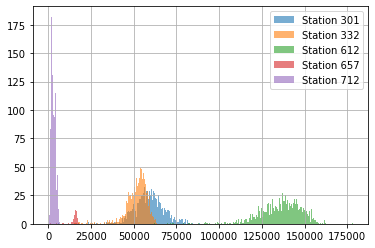

In [46]:
# make histogram of volumes by station
_binwidth = 500

# loop through all stations in the filterStations list
for s in filterStations:
    
    # get DAYVOL column for a given s station
    data = dfCCS_DayVol_fltr[dfCCS_DayVol_fltr['STATION']==s]['DAYVOL']
    
    # rename object so name appears correctly in legend
    data.name = "Station " + str(s)
    
    # display histogram, bins set from min to max with width of _binwidth, alpha sets opacity
    display(data.hist(bins=range(min(data), max(data) + _binwidth, _binwidth),alpha=0.6, legend=True))

## Boxplots for specific stations

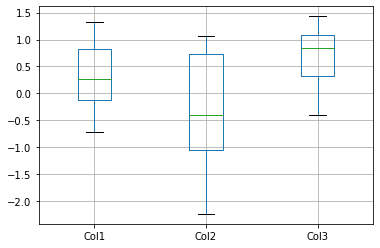

In [47]:
# convert selected data to wide format

dfCCS_DayVol_fltr_wide = dfCCS_DayVol_fltr.pivot(index='')

np.random.seed(1234)
df = pd.DataFrame(np.random.randn(10, 4),
                  columns=['Col1', 'Col2', 'Col3', 'Col4'])
boxplot = df.boxplot(column=['Col1', 'Col2', 'Col3'])  